<a href="https://colab.research.google.com/github/dierazoc-sys/TAM_2025/blob/main/tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# imports y dataset sintético
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

N = 1000
P = 20
X, y = make_regression(n_samples=N, n_features=P, noise=0.1, random_state=42)
print("X.shape, y.shape =", X.shape, y.shape)


X.shape, y.shape = (1000, 20) (1000,)


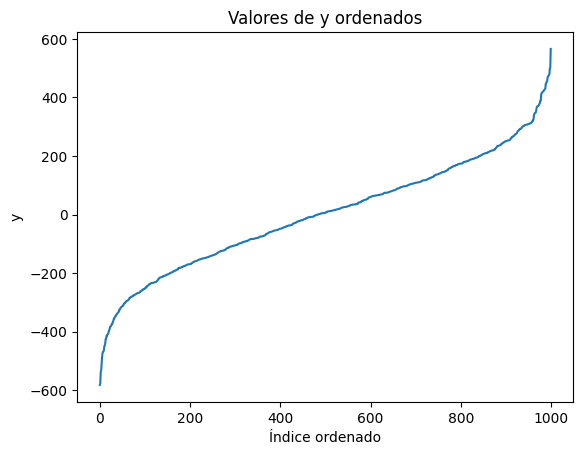

In [ ]:
# ordenado (visual)
plt.plot(np.sort(y))
plt.title("Valores de y ordenados")
plt.xlabel("Índice ordenado")
plt.ylabel("y")
plt.show()


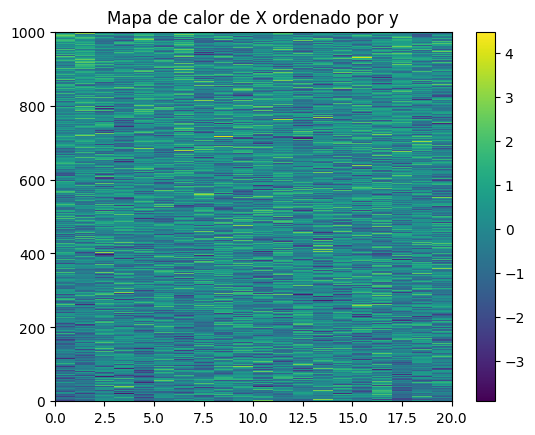

In [ ]:
# mapa de calor de X ordenada por y
ind_ = np.argsort(y)
plt.pcolormesh(X[ind_, :])
plt.colorbar()
plt.title("Mapa de calor de X ordenado por y")
plt.show()


In [ ]:
# mínimos cuadrados regularizados (closed-form)
def mincua_reg(X, y, lam_=1e-3):
    """
    alpha = (X^T X + lambda I)^{-1} X^T y
    Usamos np.linalg.solve para evitar calcular la inversa directamente.
    """
    A = X.T.dot(X) + lam_ * np.eye(X.shape[1])
    b = X.T.dot(y)
    return np.linalg.solve(A, b)


alpha (closed-form): [ 8.00015870e+01  9.85791489e+01  5.56725661e+00  2.42188895e-03
  8.64660571e+01 -3.94762241e-03  6.94305381e+01 -3.55913015e-04
  2.38018824e-03 -3.12018555e-03  1.86066282e+01  3.96353668e+01
  4.92664004e-04  3.10348876e+00 -4.42266205e-03  2.63864234e+01
 -2.42866192e-03  8.68824516e+01  3.51389388e-03  1.62268274e-03]


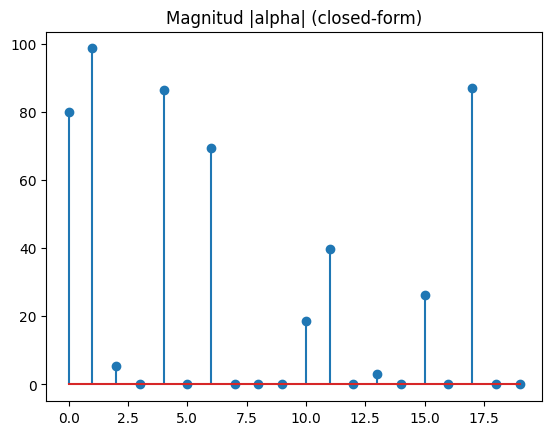

In [ ]:
# calcular alpha (closed-form) y visualizar
lam = 1e-3
alpha = mincua_reg(X, y, lam)
print("alpha (closed-form):", alpha)
plt.stem(np.abs(alpha))
plt.title("Magnitud |alpha| (closed-form)")
plt.show()

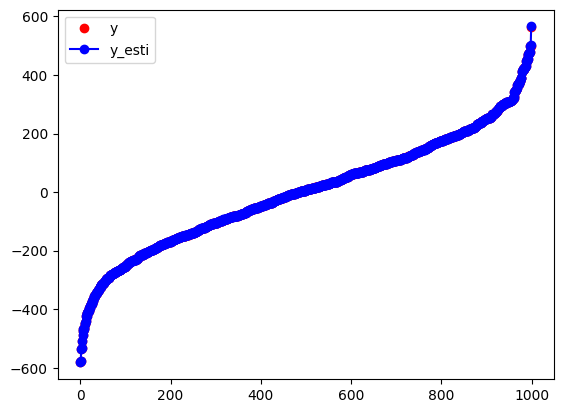

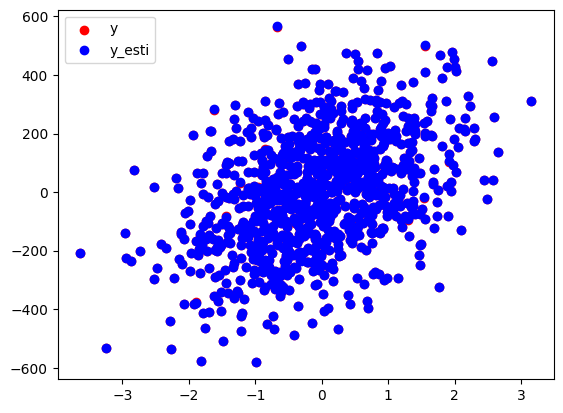

In [ ]:
# comparación ordenada y vs y_esti (closed-form)
ind_ = np.argsort(y)
y_esti = X.dot(alpha)   # usa el alpha que calculaste en la celda 5
plt.plot(y[ind_], "o", c="r", label="y")
plt.plot(y_esti[ind_], c="b", marker="o", label="y_esti")
plt.legend()
plt.show()

# Celda 6b: scatter frente a la primera característica
plt.scatter(X[ind_, 0], y[ind_], c="r", marker="o", label="y")
plt.scatter(X[ind_, 0], y_esti[ind_], c="b", marker="o", label="y_esti")
plt.legend()
plt.show()


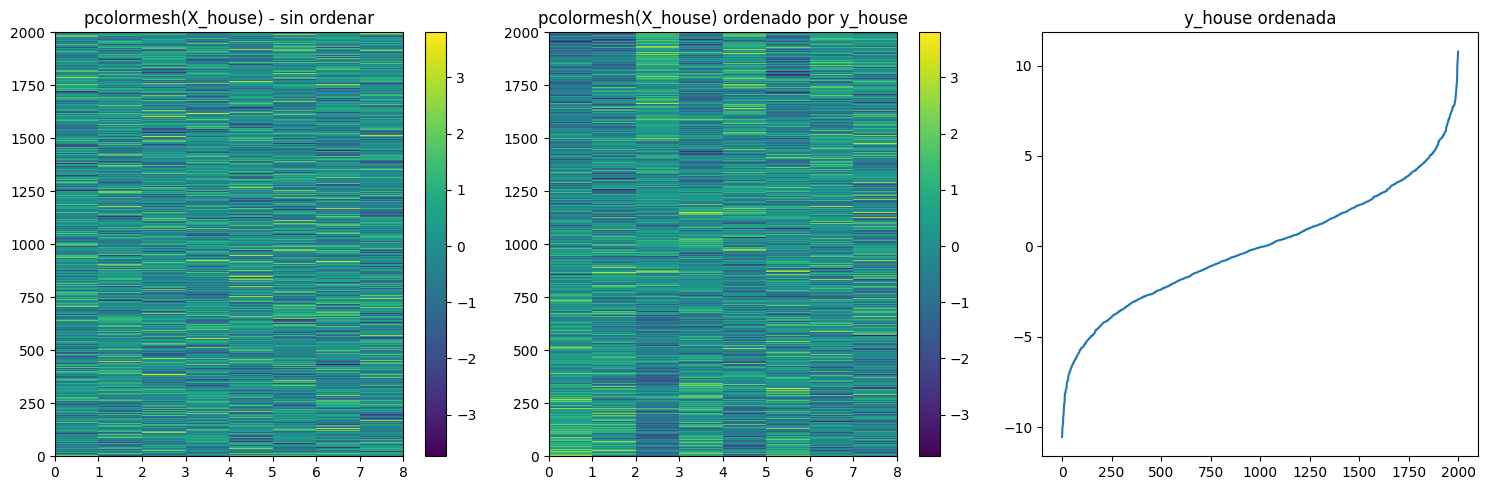

In [ ]:
# pcolormesh del dataset housing (o fallback) y ordenado por y
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

im1 = axes[0].pcolormesh(X_house)
fig.colorbar(im1, ax=axes[0])
axes[0].set_title("pcolormesh(X_house) - sin ordenar")

ind_ = np.argsort(y_house)
im2 = axes[1].pcolormesh(X_house[ind_])
fig.colorbar(im2, ax=axes[1])
axes[1].set_title("pcolormesh(X_house) ordenado por y_house")

axes[2].plot(y_house[ind_])
axes[2].set_title("y_house ordenada")

plt.tight_layout()
plt.show()

alpha (closed-form) housing: [-1.98156291 -0.83154719  2.00000352 -0.66621485  0.98609499 -0.7983256
  0.99717592  0.42829105]


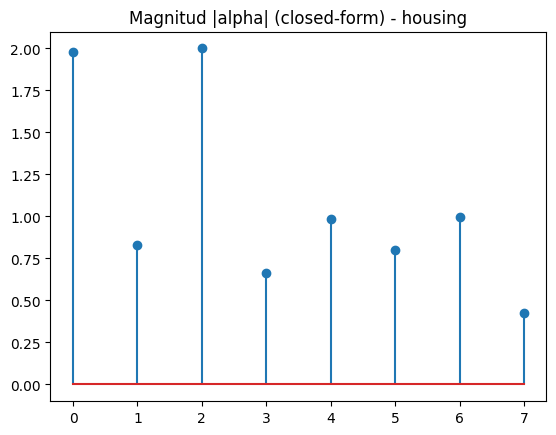

In [ ]:
# alpha closed-form (housing)
lam = 1e-3
alpha_house = mincua_reg(X_house, y_house, lam)
print("alpha (closed-form) housing:", alpha_house)
plt.stem(np.abs(alpha_house))
plt.title("Magnitud |alpha| (closed-form) - housing")
plt.show()

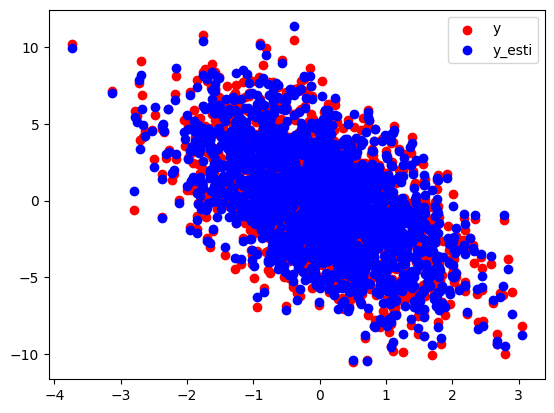

In [ ]:
# estimada y scatter
y_estimada = X_house.dot(alpha_house)

plt.scatter(X_house[ind_, 0], y_house[ind_], c="r", marker="o", label="y")
plt.scatter(X_house[ind_, 0], y_estimada[ind_], c="b", marker="o", label="y_esti")
plt.legend()
plt.show()


In [ ]:
#  funciones helper para GD y cálculo espectral del lr
def compute_spectral_lr(X, lam_=1e-3):
    N = X.shape[0]
    S = np.linalg.svd(X, compute_uv=False)
    s_max = S[0]
    L = (s_max**2)/N + lam_
    lr = 0.9 / L   # factor seguridad 0.9
    return lr, L, s_max

def grad_desc_reg(X, y, lam_=1e-3, lr=1e-3, epochs=1000, tol=1e-12, verbose=False):
    N, P = X.shape
    alpha = np.zeros(P)
    losses = []
    for i in range(epochs):
        y_pred = X.dot(alpha)
        grad = (1.0/N) * X.T.dot(y_pred - y) + lam_ * alpha
        alpha -= lr * grad
        loss = (1.0/(2*N)) * np.sum((y_pred - y)**2) + (lam_/2.0) * np.sum(alpha**2)
        losses.append(loss)
        if i>0 and abs(losses[-2] - losses[-1]) < tol:
            break
    return alpha, np.array(losses)


s_max, L, lr_suggested = 46.3591800043299 1.0755867853369305 0.8367525635953891
alpha_house_gd: [-1.9794478  -0.83066804  1.99790787 -0.66560912  0.9852512  -0.79745639
  0.9960256   0.42790057]
||alpha_closed - alpha_gd||_2 = 0.0035983930287289854


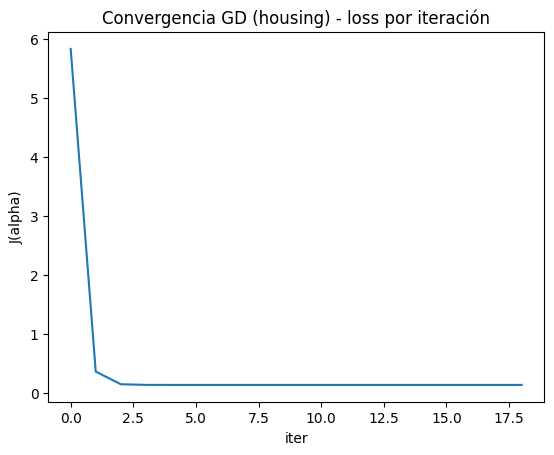

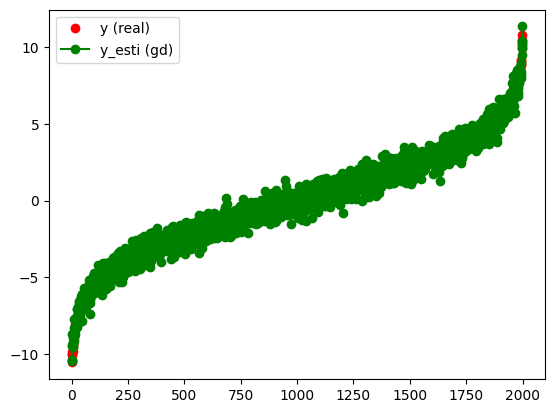

In [ ]:
# ejecutar GD en housing usando lr espectral y comparar con closed-form
lam = 1e-3
lr_house, L_house, smax_house = compute_spectral_lr(X_house, lam_=lam)
print("s_max, L, lr_suggested =", smax_house, L_house, lr_house)

alpha_house_gd, losses_house = grad_desc_reg(X_house, y_house, lam_=lam, lr=lr_house, epochs=1000)
print("alpha_house_gd:", alpha_house_gd)
print("||alpha_closed - alpha_gd||_2 =", np.linalg.norm(alpha_house - alpha_house_gd))

plt.plot(losses_house)
plt.title("Convergencia GD (housing) - loss por iteración")
plt.xlabel("iter")
plt.ylabel("J(alpha)")
plt.show()

# Graficas comparativas (ordenado por y)
y_est_gd = X_house.dot(alpha_house_gd)
plt.plot(y_house[ind_], "o", c="r", label="y (real)")
plt.plot(y_est_gd[ind_], c="g", marker="o", label="y_esti (gd)")
plt.legend()
plt.show()
